<a href="https://colab.research.google.com/github/jay-madane/ML_clg_labs/blob/main/ml_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning 1
##ANN Model

####Name: Jay Kiran Madane
####PRN: RBT21CB036
####Title: Iris Flower Classification using Artificial Neural Network (ANN).
####Aim: The aim of this project is to develop a model using Artificial Neural Networks (ANN) that can accurately predict the flower species based on various features of a flower.
####Theory:
A neural network is a machine learning (ML) model designed to mimic the function and structure of the human brain. Neural
networks are intricate networks of interconnected nodes, or neurons, that collaborate to tackle complicated problems.

Also referred to as artificial neural networks (ANNs) or deep neural networks, neural networks represent a type of deep learning
technology that's classified under the broader field of artificial intelligence (AI).

Neural networks are widely used in a variety of applications, including image recognition, predictive modeling and natural
language processing (NLP). Examples of significant commercial applications since 2000 include handwriting recognition for
check processing, speech-to-text transcription, oil exploration data analysis, weather prediction and facial recognition.



#### Code:

In [ ]:
# importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### Step 1: Data Preprocessing

In [ ]:
# Encode target variable into numerical values
encoder = LabelEncoder()
y = encoder.fit_transform(iris.target_names[y])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature data using StandardScaler:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Normalize the original data using Min-Max scaling
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

#### Step 2: Data Visualization

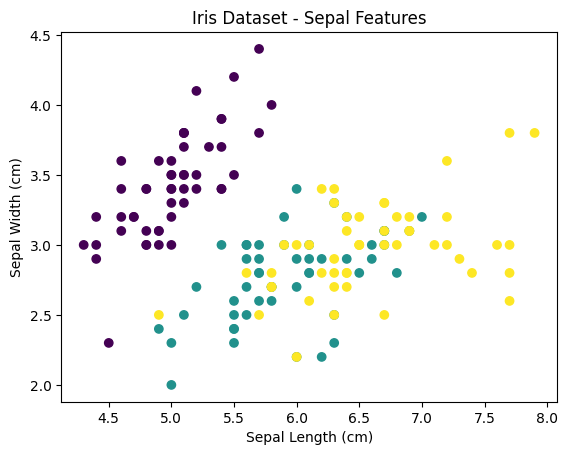

In [ ]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Features')
plt.show()

#### Step 3: Building the Model

In [ ]:
# Create an ANN model
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output neurons for 3 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Encode target variables as one-hot vectors
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
# Train the model
model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 6ms/step - loss: 0.9910 - accuracy: 0.5417
Epoch 2/50
4/4 [==============================] - 0s 7ms/step - loss: 0.9318 - accuracy: 0.6417
Epoch 3/50
4/4 [==============================] - 0s 6ms/step - loss: 0.8792 - accuracy: 0.7250
Epoch 4/50
4/4 [==============================] - 0s 5ms/step - loss: 0.8276 - accuracy: 0.7667
Epoch 5/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7845 - accuracy: 0.7667
Epoch 6/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7429 - accuracy: 0.7833
Epoch 7/50
4/4 [==============================] - 0s 5ms/step - loss: 0.7064 - accuracy: 0.8000
Epoch 8/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6726 - accuracy: 0.8000
Epoch 9/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6433 - accuracy: 0.7833
Epoch 10/50
4/4 [==============================] - 0s 5ms/step - loss: 0.6158 - accuracy: 0.7917
Epoch 11/50
4/4 [======================

#### Step 4: Model Evaluation

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1/1 [==============================] - 0s 133ms/step - loss: 0.2270 - accuracy: 0.9333
Test Loss: 0.22695320844650269, Test Accuracy: 0.9333333373069763


In [ ]:
# Visualize the model's predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 52ms/step


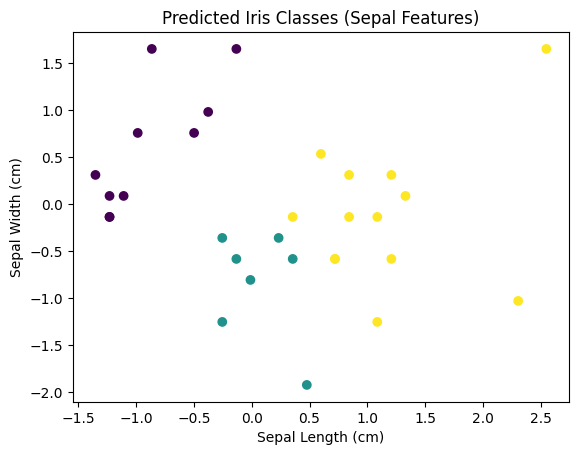

In [ ]:
# Visualizing the first two features of the testing data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_classes, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Predicted Iris Classes (Sepal Features)')
plt.show()